In [36]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

c2=0.25
A=1
B=1.5
C=-2
# c2 = 0.20
# A = 2
# B = -1
# C = -1
a21=c2
b1=1-1/(2*c2)
b2=1/(2*c2)

print(f'\nДля двухэтапного метода Рунге-Кутты: \nc2 = {c2}, \na21 = {a21}, \nb1 = {b1}, \nb2 = {b2}','\n')
#оппонент метод 30
y0=np.array([1,1,1,1])

def f(x0, y0):
    y1=[2*x0*(y0[1]**(1/B))*y0[3],
       2*B*x0*np.exp((B/C)*(y0[2]-A))*y0[3],
       2*C*x0*y0[3],
       -2*x0*np.log(y0[0])]
    return np.array(y1)

def y(x):
    x=x**2
    y=[np.exp(np.sin(x)),np.exp(B*np.sin(x)),C*np.sin(x)+A,np.cos(x)]
    return np.array(y)

def rungekutta2(x0,y0,h):
    """ЯМРК 2 порядка"""
    k1=f(x0,y0)
    # print(y0+np.dot(k1,c2*h))
    k2 = f(x0+c2*h,y0+k1*c2*h) 
    return y0+h * (k1*b1 + k2*b2)

def opponent(x0, y0,h):
    """ЯМРК 4 порядка (правило одной шестой, или классический метод
    Рунге-Кутты)
    """
    k1=f(x0,y0)
    k2 = f(x0 + (1.0 / 2) * h, y0 + (1.0 / 2) * h * k1)
    k3 = f(x0 + (1.0 / 2) * h, y0 + (1.0 / 2) * h * k2)
    k4 = f(x0 + h, y0 + k3*h)
    return y0 + np.dot(h/6,(k1 + 2*k2 + 2*k3 + k4))

def norm_dep(p,x0):
    y0=y(x0)
    y_op=y0
    Norm_1 = []
    Norm_2 = []
    H = []
    for k in range(p):
        h = 1/pow(2, k+7)
        H.append(h)
        for i in range(int(5/h)):
            """Решение первым методом"""
            y0 = rungekutta2(x0,y0, h )
            # Norm_1.append(np.linalg.norm(np.array(temp1) - np.array(y(5))))
            """Решение вторым методом"""
            y_op = opponent(x0, y_op, h)
            # Norm_2.append(np.linalg.norm(np.array(temp2) - np.array(y(5))))
            x0+=h
            yt=y(x0)
        Norm_1.append(np.linalg.norm(np.array(y0) - yt))
        Norm_2.append(np.linalg.norm(np.array(y_op) - yt))
        x0=0
        y0=[1,1,1,1]
        y_op=y0
    # H = H[2::]
    # Norm_1 = Norm_1[2::]
    # Norm_2 = Norm_2[2::]
    print(f'Шаги H:\n {np.array(H)}')
    print(f'\nНорма точной погрешности в конце отрезка для первого метода при различных h:\n {np.array(Norm_1)}')
    print(f'\nНорма точной погрешности в конце отрезка для оппонента при различных h:\n {np.array(Norm_2)}')
    # print(H,'\n')
    # print(Norm_1,'\n')
    # print(Norm_2,'\n')

    nodes=np.linspace(1,p,p)
    plt.plot(nodes, Norm_1, label='$Рунге$')
    plt.plot(nodes, Norm_2, label='$Оппонент$')
    # plt.semilogy()
    plt.grid()
    plt.title('норма точной погрешности')
    plt.legend()
    plt.show()

def step(x0,y0,h):
    return y0+h*f(x0,y0)


Для двухэтапного метода Рунге-Кутты: 
c2 = 0.25, 
a21 = 0.25, 
b1 = -1.0, 
b2 = 2.0 



In [37]:
def auto_step(x0,xk,y0,p,rtol,hmax):
    h=0
    h_2=0
    i=0
    atol=10**(-12)
    x_h2=0
    nodes,res,H=[],[],[]
    nodes.append(0)
    res.append(0)
    H.append(0)
    """выбор начального шага"""
    delta=(1/max(abs(x0),abs(xk)))**(p+1)+abs(np.linalg.norm(f(x0,y0)))**(p+1)
    h=(rtol/delta)**(1/(p+1))
    y_h1=step(x0,y0,h)
    delta =(1 / max(abs(x0),abs(xk)))**(p + 1) +(np.linalg.norm(f(x0 + h, y(x0+h))))**( p + 1)
    h1 = (rtol / delta)**( 1.0 / (p + 1))
    h=min(h,h1)
    while (x0<xk):
        h=min(xk-x0,h)
        y_h1=rungekutta2(x0,y0,h)
        y_h2=rungekutta2(x0,y0,h/2)
        x_h2+=h/2
        y_h2 = rungekutta2(x_h2, y_h2, h / 2)
        x_h2 += h / 2
        tol = (atol + rtol * np.linalg.norm(y0))
        
        r_h1 = 1/ (1 - (2**( -p))) * (y_h2 - y_h1)
        r_h2 = 1 / (2** p) * r_h1

        norm = np.linalg.norm(r_h2)
        if (norm > tol):
            h /= 2
        elif tol<=norm and norm<=tol*2**p:
            y0=y_h2
            x0+=h
            h/=2
        elif tol/2**(p+1)<=norm and norm<=tol:
            y0=y_h1
            x0+=h
        else:
            h=min(2*h,hmax)
        nodes.append(x0)
        res.append(np.log10(np.linalg.norm(np.array(y(x0)) - np.array(y0))))
        i+=1
        H.append(h)
    # print(f'Оптимальное число разбиений для постоянного шага: {h}')
    print(f'Количество шагов: {i}')
    # plt.plot(nodes,H)
    plt.plot(nodes, res)
    plt.grid()
    plt.ylabel('$|res|$')
    plt.xlabel('$x$')
    plt.show()
    

In [38]:
def opt_step(x0,xk,y0,tol):
    x_h1 = x0
    x_h2 = x0
    y_h1=y0
    y_h2=y0
    p=2
    i=0
    nodes,res=[],[]
    nodes.append(x0)
    res.append(0)
    h=0.015625

    for i in range(int(xk/h)):
        y_h1=rungekutta2(x_h1,y_h1,h)
        x_h1+=h
    for i in range(int(2*xk/h)):
        y_h2=rungekutta2(x_h2,y_h2,h/2)
        x_h2+=h/2

    r_h2=(1 / (2**(p)-1)) * (y_h2 - y_h1)
    h = (h / 2) * (tol / np.linalg.norm(r_h2))**(1/p)
    while (x0 < xk) :
        h = min(h, xk - x0)
        y0 = rungekutta2(x0, y0, h)
        x0 += h
        nodes.append(x0)
        res.append(np.log10(np.linalg.norm(np.array(y(x0)) - np.array(y0))))
        i+=1
    print(f'Приближенное решение: {y0}')
    print(f'Точное решение: {y(x0)}')
    print(f'Норма погрешности: {(np.linalg.norm(np.array(y(x0)) - np.array(y0)))}')
    print(f'Длина шага: {h}')
    print(f'Количество шагов: {i}')

    plt.plot(nodes, res)
    plt.grid()
    plt.ylabel('$|F_{true} - F_{RK_2}|$')
    plt.xlabel('$x$')
    plt.show()
    

In [39]:
def auto_step_op(x0,xk,y0,p,rtol,hmax):
    h=0
    i=0
    atol=10**(-12)
    x_h2=0
    nodes,res,H=[],[],[]
    nodes.append(0)
    res.append(0)
    H.append(0)
    """выбор начального шага"""
    delta=(1/max(abs(x0),abs(xk)))**(p+1)+abs(np.linalg.norm(f(x0,y0)))**(p+1)
    h=(rtol/delta)**(1/(p+1))
    y_h1=step(x0,y0,h)
    delta =(1 / max(abs(x0),abs(xk)))**(p + 1) +(np.linalg.norm(f(x0 + h, y(x0+h))))**( p + 1)
    h1 = (rtol / delta)**( 1.0 / (p + 1))
    h=min(h,h1)
    while (x0<xk):
        h=min(xk-x0,h)
        y_h1=opponent(x0,y0,h)
        y_h2=opponent(x0,y0,h/2)
        x_h2+=h/2
        y_h2 = opponent(x_h2, y_h2, h / 2)
        x_h2 += h / 2
        tol = (atol + rtol * np.linalg.norm(y0))
        
        r_h1 = 1/ (1 - (2**( -p))) * (y_h2 - y_h1)
        r_h2 = 1 / (2** p) * r_h1

        norm = np.linalg.norm(r_h2)
        if (norm > tol):
            h /= 2
        elif tol<=norm and norm<=tol*2**p:
            y0=y_h2
            x0+=h
            h/=2
        elif tol/2**(p+1)<=norm and norm<=tol:
            y0=y_h1
            x0+=h
        else:
            h=min(2*h,hmax)
        nodes.append(x0)
        res.append(np.log10(np.linalg.norm(np.array(y(x0)) - np.array(y0))))
        i+=1
        H.append(h)
    # print(f'Оптимальное число разбиений для постоянного шага: {h}')
    print(f'Количество шагов: {i}')
    # plt.plot(nodes,H)
    plt.plot(nodes, res)
    plt.grid()
    plt.ylabel('$|res|$')
    plt.xlabel('$x$')
    plt.show()


Приближенное решение: [0.87603101 0.81993411 1.26470748 0.99120283]
Точное решение: [0.8760328  0.81993712 1.2647035  0.99120281]
Норма погрешности: 5.29543699682289e-06
Длина шага: 3.2546050925397196e-05
Количество шагов: 45304


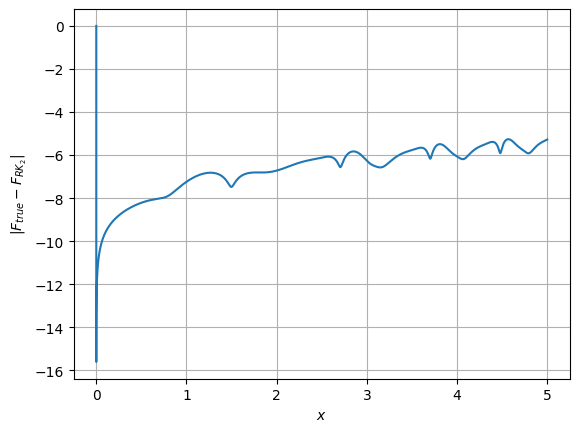

Количество шагов: 228191


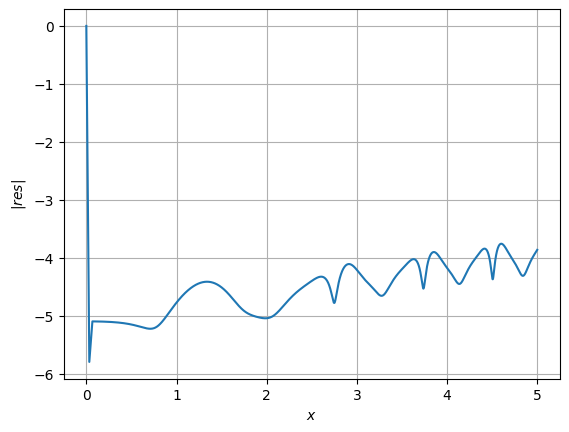

In [40]:
p=2
x0=0
x1=5 
tol=10**(-5)  
rtol=10**(-6)
# norm_dep(p,x0)
opt_step(x0,x1,y0,tol)
auto_step(x0,x1,y0,p,rtol,1/16)
auto_step_op(x0,x1,y0,p,rtol,1/16)